# Anomaly Detection

## Introduction to Anomaly Detection

**Anomaly Detection** is the process of identifying patterns in data that do not conform to expected behavior. It is crucial in various fields such as fraud detection, network security, and fault detection. Anomalies can indicate critical incidents, such as a structural defect or a security breach, and detecting them early can prevent significant damage. Anomaly detection can be categorized into three main types:

-   ****Supervised Anomaly Detection****: Requires labeled data where anomalies are known.
-   ****Unsupervised Anomaly Detection****: Does not require labeled data and identifies anomalies based on the distribution of the data.
-   ****Semi-supervised Anomaly Detection****: Uses a small amount of labeled data to guide the detection process.

****Applications of Anomaly Detection**** Anomaly detection is widely used in various domains, including:

-   ****Fraud Detection****: Identifying fraudulent transactions in banking and finance.
-   ****Network Security****: Detecting intrusions or abnormal behavior in network traffic.
-   ****Fault Detection****: Monitoring industrial systems to identify potential failures.
-   ****Healthcare****: Detecting unusual patterns in patient data that may indicate health issues.

****Challenges in Anomaly Detection**** Anomaly detection poses several challenges:

-   ****High Dimensionality****: Data with many features can make it difficult to identify anomalies.
-   ****Imbalanced Data****: Anomalies are often rare compared to normal instances, leading to class imbalance.
-   ****Dynamic Environments****: Anomalies can change over time, requiring adaptive detection methods.

****Common Techniques for Anomaly Detection****

-   ****Statistical Methods****: Use statistical tests to identify outliers based on the distribution of the data.
-   ****Machine Learning Methods****: Employ algorithms like clustering, classification, and neural networks to detect anomalies.
-   ****Distance-Based Methods****: Measure the distance between data points to identify anomalies based on their proximity to normal instances.
-   ****Density-Based Methods****: Identify anomalies based on the density of data points in a given region.
-   ****Ensemble Methods****: Combine multiple anomaly detection techniques to improve robustness and accuracy.

****Clustering for Anomaly Detection**** Clustering algorithms can be used for anomaly detection by grouping similar data points together. Anomalies are identified as points that do not belong to any cluster or are far from the nearest cluster center. Common clustering algorithms used for anomaly detection include:

-   ****k-Means Clustering****: Groups data into k clusters and identifies anomalies as points that are far from their assigned cluster centers.
-   ****DBSCAN (Density-Based Spatial Clustering of Applications with Noise)****: Groups data based on density and identifies anomalies as points that do not belong to any cluster.
-   ****Hierarchical Clustering****: Builds a hierarchy of clusters and identifies anomalies based on their distance from the nearest cluster.

### K-Means Clustering for Anomaly Detection

K-Means clustering can be used for anomaly detection by following these steps:

1.  ****Data Preparation****: Normalize or standardize the data to ensure that all features contribute equally to the distance calculations.
2.  ****Clustering****: Apply the k-Means algorithm to cluster the data into k groups.
3.  ****Distance Calculation****: Calculate the distance of each data point to its assigned cluster center.
4.  ****Anomaly Identification****: Define a threshold distance (e.g., mean distance + 2 standard deviations) to classify points as anomalies if their distance exceeds this threshold.
5.  ****Evaluation****: Validate the identified anomalies using domain knowledge or additional data.

#### Example: K-Means Clustering for Anomaly Detection

-   Create a synthetic dataset with clusters and some anomalies.

In [1]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

n_clusters = 5

# Generate synthetic data
X, _ = make_blobs(n_samples=300, centers=n_clusters,
                  cluster_std=0.5, random_state=42)

# Add some anomalies
anomalies = np.array([[10, 10], [12, 12], [15, 15]])
X = np.vstack((X, anomalies))

-   Visualize the data

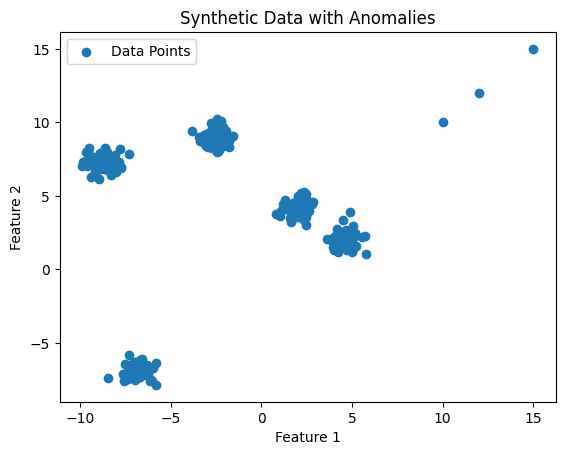

In [2]:
plt.scatter(X[:, 0], X[:, 1], marker='o', label='Data Points')
plt.title('Synthetic Data with Anomalies')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

-   Apply K-Means clustering and identify anomalies

In [3]:
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans.fit(X)

,n_clusters,5
,init,'k-means++'
,n_init,'auto'
,max_iter,300
,tol,0.0001
,verbose,0
,random_state,42
,copy_x,True
,algorithm,'lloyd'


In [4]:
# Calculate distances to cluster centers
distances = np.linalg.norm(X - kmeans.cluster_centers_[kmeans.labels_], axis=1)

In [5]:
# Define threshold for anomalies
threshold = np.mean(distances) + 2 * np.std(distances)
# Identify anomalies
anomalies = X[distances > threshold]

-   Visualize the results

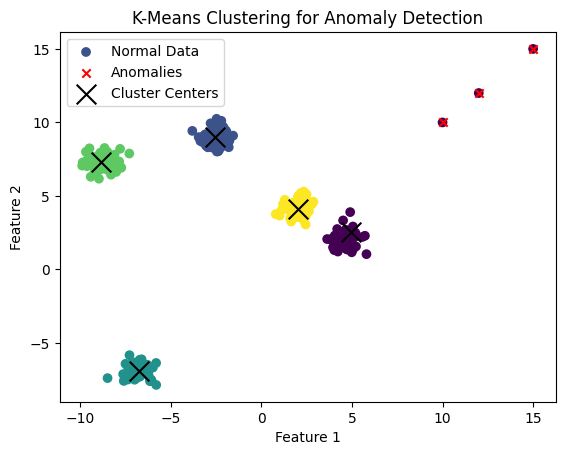

In [6]:
# Plot results
plt.scatter(X[:, 0], X[:, 1], c=kmeans.labels_, cmap='viridis',
marker='o', label='Normal Data')
plt.scatter(anomalies[:, 0], anomalies[:, 1], color='red', marker='x',
            label='Anomalies')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], color='black',
            marker='x', s=200, label='Cluster Centers')
plt.title('K-Means Clustering for Anomaly Detection')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

## Evaluation of Anomaly Detection Models

Evaluating the performance of anomaly detection models can be challenging due to the imbalanced nature of the data. Common evaluation metrics include:

-   ****Precision****: The proportion of true anomalies among the detected anomalies.
-   ****Recall****: The proportion of true anomalies that were correctly detected.
-   ****F1 Score****: The harmonic mean of precision and recall, providing a balance between the two.
-   ****ROC Curve****: A graphical representation of the true positive rate against the false positive rate at various threshold settings.
-   ****AUC (Area Under the Curve)****: A single scalar value that summarizes the performance of the model across all thresholds.

## Example: DBSCAN for Anomaly Detection and Evaluation

-   Create a synthetic dataset with clusters and anomalies

In [7]:
import numpy as np
from sklearn.datasets import make_blobs
X_core, _ = make_blobs(
    n_samples=600,
    centers=[(-2, -2), (3, 3)],
    cluster_std=[0.5, 0.6],
    random_state=42,
)
# Add anomalies
rng = np.random.RandomState(42)
X_noise = rng.uniform(low=-6, high=6, size=(40, 2))
X = np.vstack([X_core, X_noise])
y_true = np.zeros(X.shape[0], dtype=int)
y_true[-40:] = 1  # Last 40 points are anomalies

# Shuffle the X and y_true data together
df = np.hstack([X, y_true.reshape(-1, 1)])
rng.shuffle(df)
X, y_true = df[:, :-1], df[:, -1]

-   Visualize the dataset

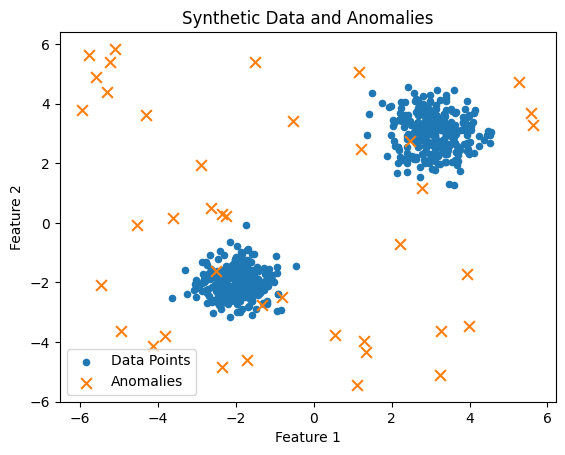

In [8]:
import matplotlib.pyplot as plt

plt.scatter(X_core[:, 0], X_core[:, 1], marker='o', s=20, label='Data Points')
plt.scatter(X_noise[:, 0], X_noise[:, 1], marker='x', s=60, label='Anomalies')
plt.title('Synthetic Data and Anomalies')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

-   Standardize features

In [9]:
from sklearn.preprocessing import StandardScaler
X_scaled = StandardScaler().fit_transform(X)

-   Fit DBSCAN Clustering Model

In [10]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=0.25, min_samples=8)
labels = dbscan.fit_predict(X_scaled)
print(labels)

[ 0  0  1  1 -1  0  1  1  0  0  1  1  1  1  1  1  1  0  1  1  0  0  0  0
  0  0  1  1  1  0  0  0  1  0  0  0  0  0  1  0  1  0  0  0  1  0  0  0
  1  1  0  1  1  1  0  0  0  0  1  0  0  1  0  1  1  1  0  1  1  1  1  0
  1 -1  1  1  1  1  1  1  0  0  0  0  0  1  1  0  1  0  1  0  1  0  1  0
  1  0  0  1  1  1  1  1  1  0 -1  0  1  1  0  1  1  1  0 -1 -1  1  0  0
  0  0 -1  1  1  0  1  1  0  0  1  0  1  1  1  0  1  1  1  0  0  1  0  0
  1  0  1  0  0  1  1  1  0  0  0  1  1 -1  1  0  1  0  1 -1  1  0  0  1
  1  1  0  1  0  0  0  0 -1  0  1  1  0  1  1  0  0  0  0  0  0  1  1  0
  0  0  0  1  1 -1  0  0 -1  0  0  1  0  1 -1  1  0  1  0  0 -1  1  1  1
  0  1  1  0  1  0  1  0  0  0  1  1  1  0  0  1  1  0  1  0  1  1  0 -1
  1  0  1  1  1  1  1  1  0  1  0  1  1  0  0  0  0  1  0  0  0  0  1  0
  1  0  0  0  1  1  0  0  0  1  0  1  0  0  1  0  0  1  1  1  1  1  0  1
  1  0  0  0  1  0 -1  0  1  1 -1  0  1  1  0  0  1  1  1 -1  1  0  1  0
  1  0  0  1  0  1  1 -1  1  0 -1  0  1  1  0  0  1

-   Collect results

In [11]:
core_mask     = labels != -1        # regular points
anomaly_mask  = labels == -1        # DBSCAN calls these “noise”

print(f"Detected {anomaly_mask.sum()} anomalies out of {X.shape[0]} total points")

Detected 36 anomalies out of 640 total points


-   Visualize the results

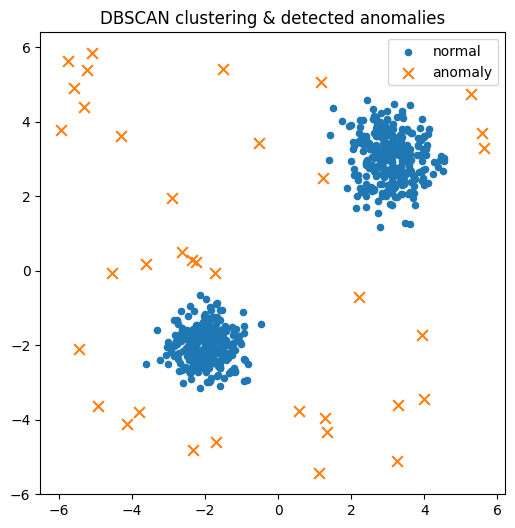

In [12]:
fig, ax = plt.subplots(figsize=(6, 6))
ax.scatter(*X[core_mask].T,  marker='o', s=20, label='normal')
ax.scatter(*X[anomaly_mask].T, marker='x', s=60, label='anomaly')
ax.set_title("DBSCAN clustering & detected anomalies")
ax.legend()
plt.show()

-   Evaluate the model

Classification report:
              precision    recall  f1-score   support

      normal      0.992     0.998     0.995       600
     anomaly      0.972     0.875     0.921        40

    accuracy                          0.991       640
   macro avg      0.982     0.937     0.958       640
weighted avg      0.991     0.991     0.990       640



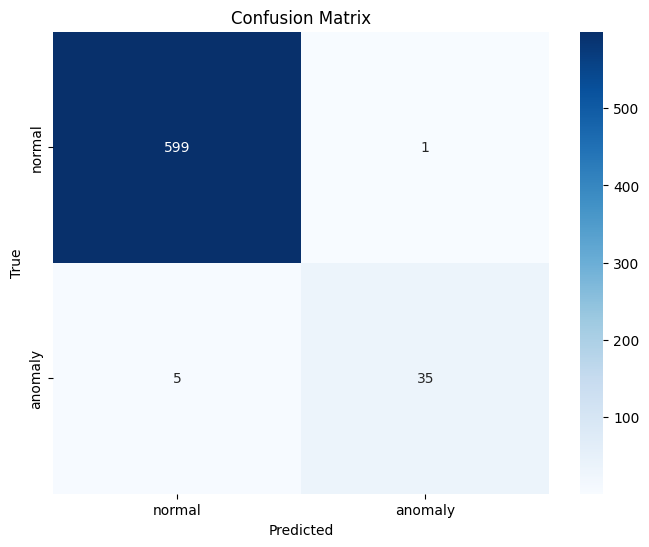

In [13]:
from sklearn.metrics import classification_report, confusion_matrix

# ground-truth labels: 0 = normal, 1 = anomaly
# y_true = np.zeros(X.shape[0], dtype=int)
# y_true[-40:] = 1

# model predictions: DBSCAN marks anomalies with label -1
y_pred = (labels == -1).astype(int)

print("Classification report:")
print(classification_report(
    y_true, y_pred,
    target_names=["normal", "anomaly"],
    digits=3))

# Visualize the confusion matrix
import seaborn as sns
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_true, y_pred), annot=True, fmt='d',
            xticklabels=["normal", "anomaly"], yticklabels=["normal", "anomaly"],
            cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()